Many of the examples we presented in the last chapters of randomness 
fall into the class of computation known as Monte Carl 
simulation
. Monte Carlo simulation is a technique used  o
approximate the probability of an event by running the s me
simulation multiple times and averaging the resu
Ulam came up with the idea when trying to find the odds of winning at the game of solitare. Even for a great mathmatician, it was too complicated, and rather it was easier to just simulate the game many times over, and see the chances of winning. 

In [16]:
#SAMPLE MONTE CARLO SIM
#Two reports are due at the end of the day, but you have to go to a family bbq at 6:00
#Report A takes 1-5 hours and B takes 2-6 hours to finish.
#What is the probability you can get the reports done and make it to the bbq?

import numpy as np
import matplotlib.pyplot as plt
def run_plot_and_sims(sims):
    A = np.random.uniform(1, 5, sims)
    B = np.random.uniform(2, 6, sims)
    duration = A + B

    percent_over_nine = (duration > 9).sum()/sims

    # Plotting
    plt.figure(figsize = (3,1.5))
    plt.hist(duration, density = True)
    plt.axvline(9, color = 'r')
    print(f'With {sims} sims. The chance you finish both reports and make it to the bbq is {percent_over_nine}')

sim_list = [100, 500, 1000, 10000]


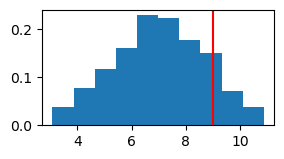

0.135


In [4]:
plt.figure(figsize = (3,1.5))
plt.hist(duration, density = True)
plt.axvline(9, color = 'r')
plt.show()
print((duration > 9).sum()/sims)

With 100 sims. The chance you finish both reports and make it to the bbq is 0.15
With 500 sims. The chance you finish both reports and make it to the bbq is 0.124
With 1000 sims. The chance you finish both reports and make it to the bbq is 0.113
With 10000 sims. The chance you finish both reports and make it to the bbq is 0.1271


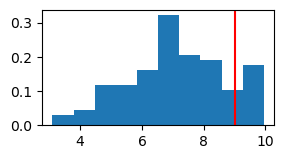

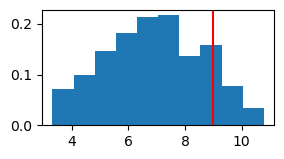

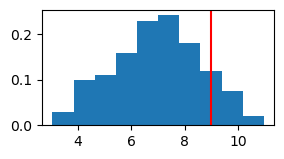

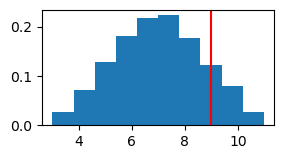

In [17]:
for sims in sim_list:
    run_plot_and_sims(sims)

We can see the distribution of time it is going to take to finish the reports. Only ~12% of the time they were completed before 9 hours. If we were to run more sims, we could get a more accurate result. 

Monte Carlo is part of the Interential statistics, which takes a popultion (set of examples), a sample of the population. This is the same base as a random walk

Looking at roulette, its a simple game, that wouldn't need to be simulated because the probabilities are easily calculated. 

In [27]:
import random

class FairRoulette():
    def __init__(self):
        self.pockets = [] #create wheel
        for i in range(1,37):
            self.pockets.append(i) #add 36 pockets to wheel
        self.ball = None # ball is not on table
        self.pocketOdds = len(self.pockets) - 1 # odds for pocket are 36 -1, so win 35 plus original bet
    def spin(self):
        self.ball = random.choice(self.pockets) #spin ball into a random pocket
    def betPocket(self, pocket, amt): #place a bet on a pocket
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds 
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

roulette = FairRoulette()
print(roulette)

roulette.spin()
print(f'Ball landed on pocket {roulette.ball}')

bet_amount = 10
bet_pocket = 17
result = roulette.betPocket(bet_pocket, bet_amount)
print(f'Result of betting {bet_amount} on pocket {bet_pocket}: {result}')

Fair Roulette
Ball landed on pocket None
Result of betting 10 on pocket 17: -10


In [29]:
# play roulette many times
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

random.seed(0)
game = FairRoulette()
pocket = 2
bet = 1
for numSpins in (100, 1_000_000):
    for i in range(3):
        playRoulette(game, numSpins, pocket, bet, True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%



**Gamblers fallacy**: The gambler's fallacy is a cognitive bias that occurs when individuals believe that the outcomes of random events are somehow influenced by previous outcomes, even when each event is independent and has no bearing on the next. In the context of roulette, the gambler's fallacy manifests when players believe that the likelihood of a particular outcome is affected by the results of previous spins.

For example, if the ball has landed on red for the past 10 spins, someone falling victim to the gambler's fallacy might believe that black is "due" and is more likely to occur on the next spin. In reality, the probability of landing on red or black on each spin is always close to 50% (assuming a fair, unbiased wheel).

**Regression to the mean** is a statistical phenomenon that occurs when a variable that is extreme on its first measurement tends to move closer to the average (mean) on its second measurement. In other words, if an event is unusually high or low, it is likely to be less extreme upon subsequent measurements.

Suppose a gambler observes a sequence of ten spins on a fair roulette wheel, and all ten spins result in the ball landing on red. The gambler might think that red is "hot" and more likely to occur, leading to the gambler's fallacy. However, from a statistical perspective, each spin of the wheel is an independent event, and the probability of landing on red remains the same on each spin.

Now, if the gambler observes the next ten spins and finds that the outcomes are a mix of red and black, the sequence may appear to "regress to the mean." In this case, the extreme outcome of ten consecutive red spins is followed by a sequence that is more representative of the overall probability of red and black.

Regression to the mean doesn't imply a guaranteed return to the average; rather, it suggests a tendency for extreme events to be followed by outcomes that are closer to the average. In the context of gambling, understanding this phenomenon can help players recognize that streaks of outcomes are not indicative of a change in the underlying probabilities. The next set of outcomes is likely to be more balanced, simply due to the inherent randomness of the game.

In [31]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

In [32]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%
Exp. return for European Roulette = -2.26%
Exp. return for American Roulette = -8.92%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%
Exp. return for European Roulette = -4.168%
Exp. return for American Roulette = -5.752%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8144%
Exp. return for European Roulette = -2.6506%
Exp. return for American Roulette = -5.113%

Simulate 20 trials of 1000000 spins each
Exp. return for Fair Roulette = -0.0723%
Exp. return for European Roulette = -2.7329%
Exp. return for American Roulette = -5.212%


How many samples do we need to look at before we are confident in our results.

Variance. Taking the euclidian distance from each point to the mean, and averaging it over the number of points. 

Its better to give a confidence interval, which gives a range, and a percentage chance that the outcome is within that range
Example:
The return on berring a pocket 10k times in European  
roulette is -3.3%. The margin of error is +/- 3.5% with a 95 
level of confiden

Empircal Rule: Assumptions
* 68% in 1 stdev
* 95% in 2 stdev
* 99.7% in 3 stdevce

In [33]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        mean,std = getMeanAndStd(pocketReturns)
        resultDict[G().__str__()].append((numSpins, 100*mean, 100*std))
        
        print('Exp. return for', G(), '=',
            str(round(100*mean, 3))
            + '%,', '+/- ' + str(round(100*1.96*std, 3))
            + '% with 95% confidence') 



Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%, +/- 42.065% with 95% confidence
Exp. return for European Roulette = -2.26%, +/- 32.89% with 95% confidence
Exp. return for American Roulette = -8.92%, +/- 35.146% with 95% confidence

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%, +/- 11.578% with 95% confidence
Exp. return for European Roulette = -4.168%, +/- 11.559% with 95% confidence
Exp. return for American Roulette = -5.752%, +/- 10.585% with 95% confidence

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.814%, +/- 3.038% with 95% confidence
Exp. return for European Roulette = -2.651%, +/- 4.111% with 95% confidence
Exp. return for American Roulette = -5.113%, +/- 4.436% with 95% confidence


# Confidence Intervals

**Bootstrapping Refresher:**

Take the mean of a sample, and use bootstrapping to get the population mean. Take n number of points from a sample and calulate the mean. Sampling the same points is ok. Do this 10_000 times and you get many different means. 

A 95% confidence interval is just a interval that covers 95% of the means resulting from bootstrapping. 

**Central Limit Theorem**:

Regardless of the shape of the original population distribution, the sampling distribution of the sample mean will tend to be approximately normally distributed if the sample size is sufficiently large.

In [37]:
import pylab

Fraction within ~200 of mean = 0.9571469999999963


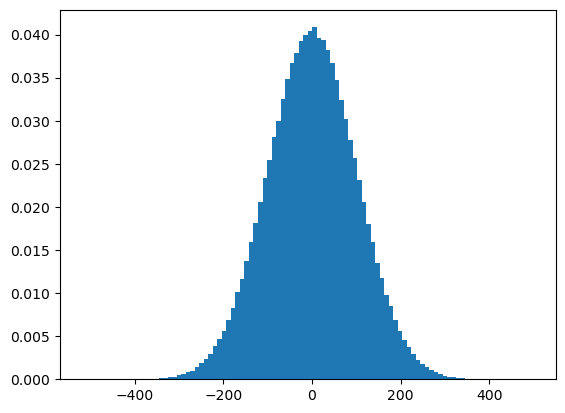

In [39]:
# generating a discrete approximation of a normal distribution
random.seed(1)
dist, numSamples = [], 1000000

for i in range(numSamples):
   dist.append(random.gauss(0, 100)) # args are mean & stdev
   
weights = [1/numSamples]*len(dist)
v = pylab.hist(dist, bins = 100,
              weights = [1/numSamples]*len(dist)) #weights give the fraction, not count, of the values in the bins
              
print('Fraction within ~200 of mean =',
     sum(v[0][30:70])) 

Text(0.5, 1.0, 'Normal Distribution, mu = 0, sigma = 1')

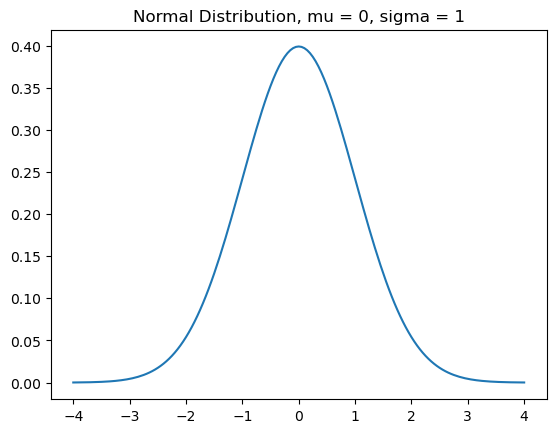

In [40]:
def gaussian(x, mu, sigma):
 factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
 factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
 return factor1*factor2 #formula for gaussian distribution
 
xVals, yVals = [], []
mu, sigma = 0, 1 #standard normal distribution
x = -4 #setting the limit of the chart
while x <= 4:
   xVals.append(x)
   yVals.append(gaussian(x, mu, sigma))
   x += 0.05
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu)\
           + ', sigma = ' + str(sigma))
#

What exactly is the Y? The Y is the density at some point x. The point Y is the derivative at the point, and the area under is the integral at that point. The integrals under points, aka shape of the curve, is what gives the insights and probabilty. 

In [42]:
import scipy.integrate

def checkEmpirical(numTrials):
  for t in range(numTrials):
     mu = random.randint(-10, 10) #mean
     sigma = random.randint(1, 10) #stdev
     print('For mu =', mu, 'and sigma =', sigma)
     for numStd in (1, 1.96, 3):
        area = scipy.integrate.quad(gaussian, #function
                                    mu-numStd*sigma, #lower limit of integration
                                    mu+numStd*sigma, #upper limit of integration
                                    (mu, sigma))[0] #values for the arguments of gaussian
        print(' Fraction within', numStd,
              'std =', round(area, 4))
        
checkEmpirical(3)

For mu = 4 and sigma = 10
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -7 and sigma = 6
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -2 and sigma = 9
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973


Here we see that the empirical rules really works.

So what about roulette wheels that has a uniform distribution? Each pocket has an equal chance. We are reasoning not about a single spin, but rather looking at the ourcome of many spins, and taking the mean of the set of spins. Then we can use CLT

**Central Limit Theorem**:

1. Regardless of the shape of the original population distribution, the sampling distribution of the sample mean will tend to be approximately normally distributed if the sample size is sufficiently large.
2. The normal distribution will have a mean close to the mean of the population.
3. THe cariance of the sample means, will be close to the variance of the population divided by the sample size. 

Mean of rolling 1 die = 2.5002881907357932, Std = 1.4427720830482094
Mean of rolling 50 dice = 2.5005231676126476, Std = 0.20506892240388655


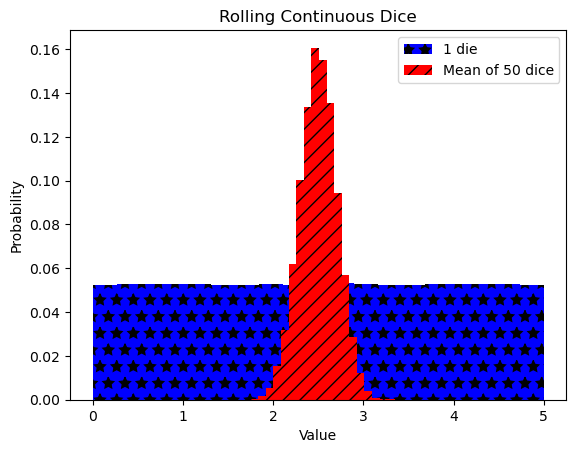

In [46]:
#Test CLT for a continuous die
def plotMeans(numDice, #num of dice rolled in each trial
              numRolls,#total number of rolls in each trial
              numBins,
              legend, color, style):
   means = [] #initialize empty list
   for i in range(numRolls//numDice): # number of experiments
       vals = 0
       for j in range(numDice):
           vals += 5*random.random() #random from 0-1
       means.append(vals/float(numDice)) #append the number to the mean list
   pylab.hist(means, numBins, color = color, label = legend,
              weights = [1/len(means)]*len(means), #An array of weights, where each mean contributes equally to the histogram
              hatch = style) #This is useful when you want to visualize the distribution of means regardless of the number of samples.
   return getMeanAndStd(means)

mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

Text(0.5, 1.0, 'Expected Return Betting a Pocket 200 Times')

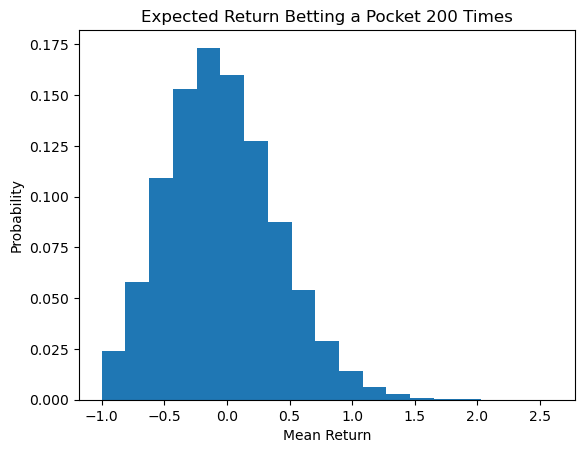

In [47]:
#Test CLT on roulette
numTrials = 1000000
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
   means.append(findPocketReturn(game, 1, numSpins,
                                 False)[0])

pylab.hist(means, bins = 19,
          weights = [1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200 Times')

In [53]:
import numpy
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random() #0-1
        y = random.random() #0-1
        if (x**2 + y**2)**0.5 <= 1.0: #distance formula, circle radius is 1. Is needle in circle?
            inCircle += 1
    return 4*(inCircle/float(numNeedles)) #area of circle = (area of square * needles in circle) / needles in square
    
def getEst(numNeedles, numTrials):
    estimates = []
    #perform multipe trials
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles) #gets an estimate for pie for each trial
        estimates.append(piGuess) #append the guess 
    sDev = numpy.std(estimates) #compute the stdev from the estimates
    curEst = sum(estimates)/len(estimates) 
    print('Est. = ' + str(round(curEst,6)) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles,
                              numTrials)
        numNeedles *= 2
    return curEst

random.seed(0)
estPi(0.005, 100)

Est. = 1.57422, Std. dev. = 0.023943, Needles = 1000
Est. = 1.56959, Std. dev. = 0.017748, Needles = 2000
Est. = 1.57054, Std. dev. = 0.013565, Needles = 4000
Est. = 1.570717, Std. dev. = 0.008402, Needles = 8000
Est. = 1.570677, Std. dev. = 0.00685, Needles = 16000
Est. = 1.570657, Std. dev. = 0.004238, Needles = 32000
Est. = 1.570586, Std. dev. = 0.003514, Needles = 64000
Est. = 1.570795, Std. dev. = 0.002017, Needles = 128000


1.5707948437499997